# Read Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your dataset
data = pd.read_csv('covid_factTable.csv')

In [3]:
data.head(10)

,dateid,vacid,covidid,date,province,totalcases,recovery,death,partial,fully,booster,totalcases_change,recovery_change,death_change,partial_change,fully_change,booster_change
0,1,1,1,2021-01-02,BC,53162,42129,901,17510,0,0,0,0,0,0,0,0
1,1,2,2,2021-01-02,AB,104633,84827,1267,14244,0,0,0,0,0,0,0,0
2,1,3,3,2021-01-02,SK,15844,12975,158,3722,0,0,0,0,0,0,0,0
3,1,4,4,2021-01-02,MB,25026,19789,678,3540,2,0,0,0,0,0,0,0
4,1,5,5,2021-01-02,ON,193960,160526,4905,33191,0,0,0,0,0,0,0,0
5,1,6,6,2021-01-02,QC,204101,172047,7966,28691,1,0,0,0,0,0,0,0
6,1,7,7,2021-01-02,NL,390,372,4,1785,0,0,0,0,0,0,0,0
7,1,8,8,2021-01-02,NB,611,568,9,2905,0,0,0,0,0,0,0,0
8,1,9,9,2021-01-02,NS,1497,1399,65,2596,0,0,0,0,0,0,0,0
9,1,10,10,2021-01-02,PE,97,89,0,1932,0,0,0,0,0,0,0,0


In [4]:
summed_data = data.groupby("date").agg({
    'totalcases': 'sum',
    'recovery': 'sum',
    'death': 'sum',
    'partial': 'sum',
    'fully': 'sum',
    'booster': 'sum',
    'totalcases_change': 'sum',
    'recovery_change': 'sum',
    'death_change': 'sum',
    'partial_change': 'sum',
    'fully_change': 'sum',
    'booster_change': 'sum'
}).reset_index()

summed_data

,date,totalcases,recovery,death,partial,fully,booster,totalcases_change,recovery_change,death_change,partial_change,fully_change,booster_change
0,2021-01-02,599675,495066,15955,110118,3,0,0,0,0,0,0,0
1,2021-01-09,656408,552374,17020,300249,3941,0,56733,57308,1065,190131,3938,0
2,2021-01-16,704262,608068,18003,553819,20620,0,47854,55694,983,253570,16679,0
3,2021-01-23,741738,658971,19053,815195,54593,0,37476,50903,1050,261376,33973,0
4,2021-01-30,772321,700900,19909,968205,111205,0,30583,41929,856,153010,56612,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2023-12-02,4844720,3954939,56724,101440992,31596053,19733320,11683,0,215,282948,706,7245
153,2023-12-09,4856586,3954939,56950,101693702,31594976,19738493,11866,0,226,252710,-1077,5173
154,2023-12-16,4868947,3954939,57132,101888153,31594521,19743667,12361,0,182,194451,-455,5174
155,2023-12-23,4880937,3954939,57311,102006204,31595524,19747995,11990,0,179,118051,1003,4328


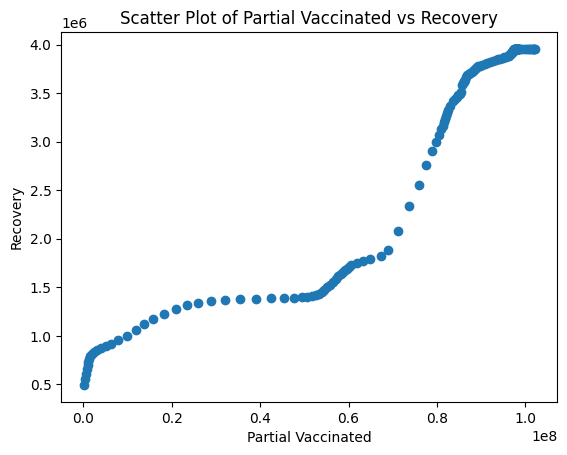

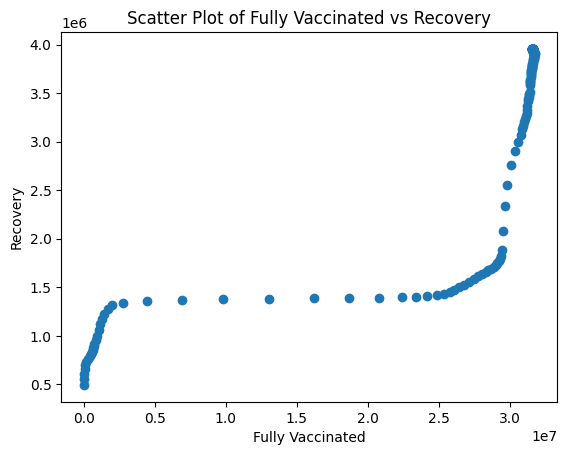

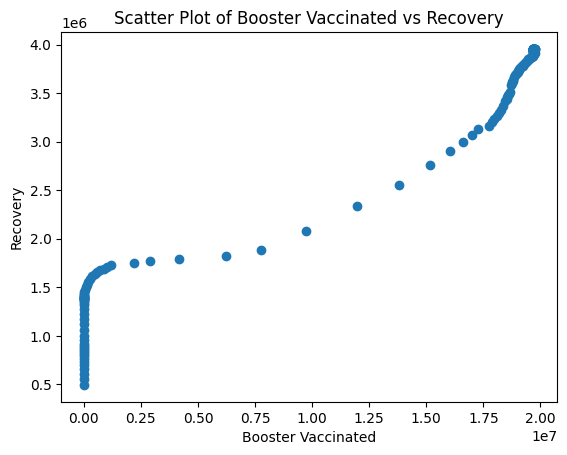

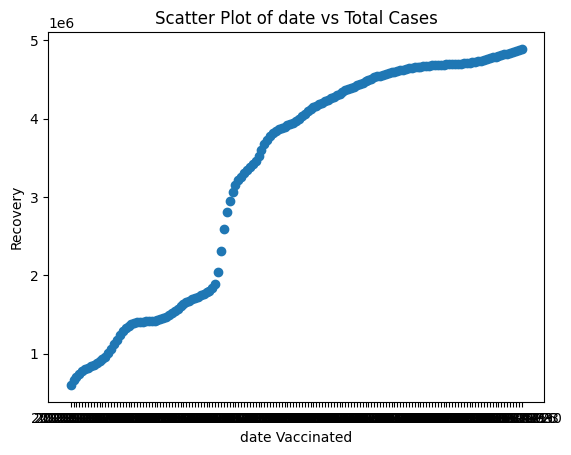

In [5]:
plt.scatter(summed_data['partial'] , summed_data['recovery'])
plt.xlabel('Partial Vaccinated')
plt.ylabel('Recovery')
plt.title('Scatter Plot of Partial Vaccinated vs Recovery')
plt.show()

plt.scatter(summed_data['fully'] , summed_data['recovery'])
plt.xlabel('Fully Vaccinated')
plt.ylabel('Recovery')
plt.title('Scatter Plot of Fully Vaccinated vs Recovery')
plt.show()

plt.scatter(summed_data['booster'] , summed_data['recovery'])
plt.xlabel('Booster Vaccinated')
plt.ylabel('Recovery')
plt.title('Scatter Plot of Booster Vaccinated vs Recovery')
plt.show()

plt.scatter(summed_data['date'] , summed_data['totalcases'])
plt.xlabel('date Vaccinated')
plt.ylabel('Recovery')
plt.title('Scatter Plot of date vs Total Cases')
plt.show()

# One-Class SVM Algorithm

We will discuss the outlier for vaccination status 

In [6]:
summed_data

,date,totalcases,recovery,death,partial,fully,booster,totalcases_change,recovery_change,death_change,partial_change,fully_change,booster_change
0,2021-01-02,599675,495066,15955,110118,3,0,0,0,0,0,0,0
1,2021-01-09,656408,552374,17020,300249,3941,0,56733,57308,1065,190131,3938,0
2,2021-01-16,704262,608068,18003,553819,20620,0,47854,55694,983,253570,16679,0
3,2021-01-23,741738,658971,19053,815195,54593,0,37476,50903,1050,261376,33973,0
4,2021-01-30,772321,700900,19909,968205,111205,0,30583,41929,856,153010,56612,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2023-12-02,4844720,3954939,56724,101440992,31596053,19733320,11683,0,215,282948,706,7245
153,2023-12-09,4856586,3954939,56950,101693702,31594976,19738493,11866,0,226,252710,-1077,5173
154,2023-12-16,4868947,3954939,57132,101888153,31594521,19743667,12361,0,182,194451,-455,5174
155,2023-12-23,4880937,3954939,57311,102006204,31595524,19747995,11990,0,179,118051,1003,4328


In [7]:
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split

x = summed_data[['partial','fully','booster']]
y = summed_data['totalcases']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3)

In [8]:
clf = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)
clf.fit(Xtrain,Ytrain)
predictions = clf.predict(Xtest)

print("The number of outlier is "+str(len(predictions[predictions == -1])))

# Identify outlier indices
outliers_indices = predictions == -1

# Extract outlier data points
outlier_data = Xtest[outliers_indices]

outlier_data = outlier_data.sort_index()
# Print or further analyze the outlier data
print("Outlier Data:")
print(outlier_data)

The number of outlier is 48
Outlier Data:
       partial     fully   booster
8      1873761    530369        11
9      2371024    578708        12
11     3922570    646557        19
13     6355667    733317        27
14     7907018    831973        33
20    20901862   1687596       202
22    25983643   2786610       377
23    28877658   4419661       516
24    32086233   6893862       791
26    39047671  13053759      1530
30    49515689  22408293      6214
31    50695024  23393792      8813
38    55906674  26797552    160770
39    56528483  27141343    201722
41    57671217  27732389    376367
43    58717091  28291344    583059
44    59150324  28495260    723010
49    63224242  29219075   2879391
51    67290029  29390929   6228744
55    75828249  29808707  13812318
58    79783888  30579792  16603208
59    80399443  30760426  16982289
63    81859131  31084144  17974289
67    83009859  31244577  18340536
71    84782244  31346409  18589083
80    86809232  31478759  18886012
82    8758907

In [9]:
# import pandas as pd
# from sklearn.ensemble import IsolationForest

# # Load the dataset
# # summed_data = pd.read_csv('covid_FactTable.csv')

# # Select the relevant features for outlier detection
# features = ['totalcases', 'recovery', 'death', 'partial', 'fully', 'booster']
# X = summed_data[features]

# # Create an Isolation Forest object
# isolation_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, random_state=42)

# # Fit the Isolation Forest model
# isolation_forest.fit(X)

# # Get the anomaly scores for each data point
# anomaly_scores = isolation_forest.decision_function(X)

# # Identify outliers based on a threshold
# outlier_threshold = -0.01
# outliers = summed_data[anomaly_scores < outlier_threshold]

# # Print the outliers
# print("Identified Outliers:")
# print(outliers)

In [10]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd


Read data and describe

In [11]:
df=pd.read_csv('covid_factTable.csv')
print(df.head(10))
print(df.describe())

   dateid  vacid  covidid        date province  totalcases  recovery  death  \
0       1      1        1  2021-01-02       BC       53162     42129    901   
1       1      2        2  2021-01-02       AB      104633     84827   1267   
2       1      3        3  2021-01-02       SK       15844     12975    158   
3       1      4        4  2021-01-02       MB       25026     19789    678   
4       1      5        5  2021-01-02       ON      193960    160526   4905   
5       1      6        6  2021-01-02       QC      204101    172047   7966   
6       1      7        7  2021-01-02       NL         390       372      4   
7       1      8        8  2021-01-02       NB         611       568      9   
8       1      9        9  2021-01-02       NS        1497      1399     65   
9       1     10       10  2021-01-02       PE          97        89      0   

   partial  fully  booster  totalcases_change  recovery_change  death_change  \
0    17510      0        0                  0     

# Histogram

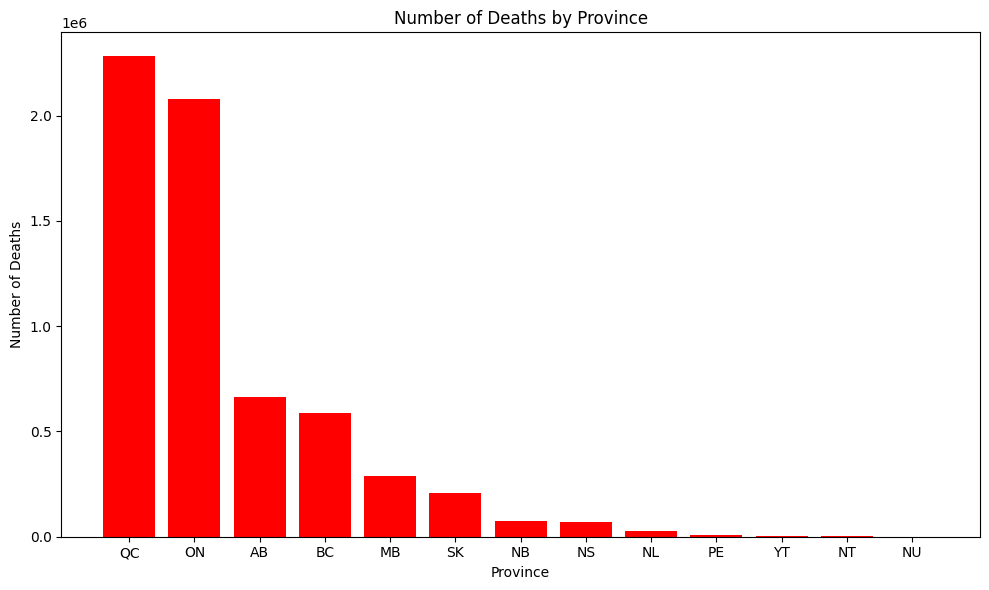

In [12]:
deaths_per_province = df.groupby('province')['death'].sum().reset_index()

# Sort the data for better visualization
deaths_per_province_sorted = deaths_per_province.sort_values(by='death', ascending=False)

# create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size 
plt.bar(deaths_per_province_sorted['province'], deaths_per_province_sorted['death'], color='red')

plt.title('Number of Deaths by Province')
plt.xlabel('Province')
plt.ylabel('Number of Deaths')
 

# Show the plot
plt.tight_layout()  
plt.show()

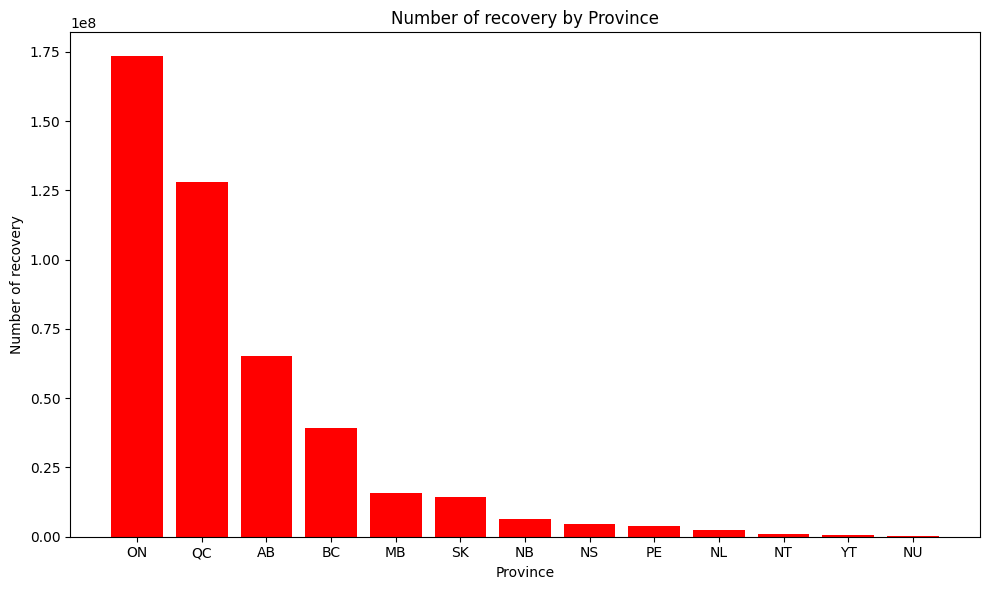

In [13]:
deaths_per_province = df.groupby('province')['recovery'].sum().reset_index()

# Sort the data for better visualization
deaths_per_province_sorted = deaths_per_province.sort_values(by='recovery', ascending=False)

# create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size 
plt.bar(deaths_per_province_sorted['province'], deaths_per_province_sorted['recovery'], color='red')

plt.title('Number of recovery by Province')
plt.xlabel('Province')
plt.ylabel('Number of recovery')


# Show the plot
plt.tight_layout()  
plt.show()

### Vaccination in different provinces

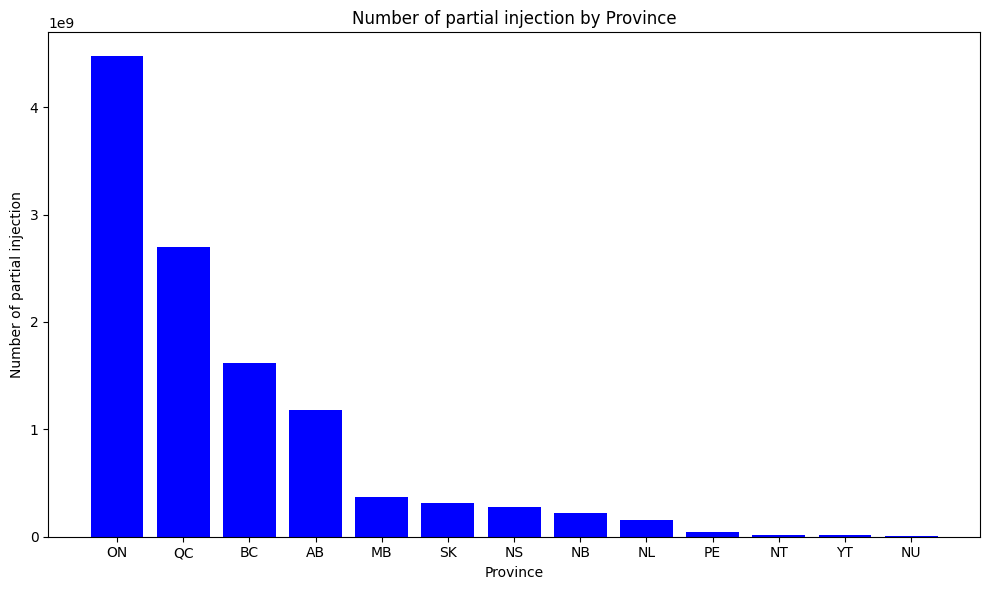

In [14]:
deaths_per_province = df.groupby('province')['partial'].sum().reset_index()

# Sort the data for better visualization
deaths_per_province_sorted = deaths_per_province.sort_values(by='partial', ascending=False)

# create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size 
plt.bar(deaths_per_province_sorted['province'], deaths_per_province_sorted['partial'], color='blue')

plt.title('Number of partial injection by Province')
plt.xlabel('Province')
plt.ylabel('Number of partial injection')


# Show the plot
plt.tight_layout()  
plt.show()

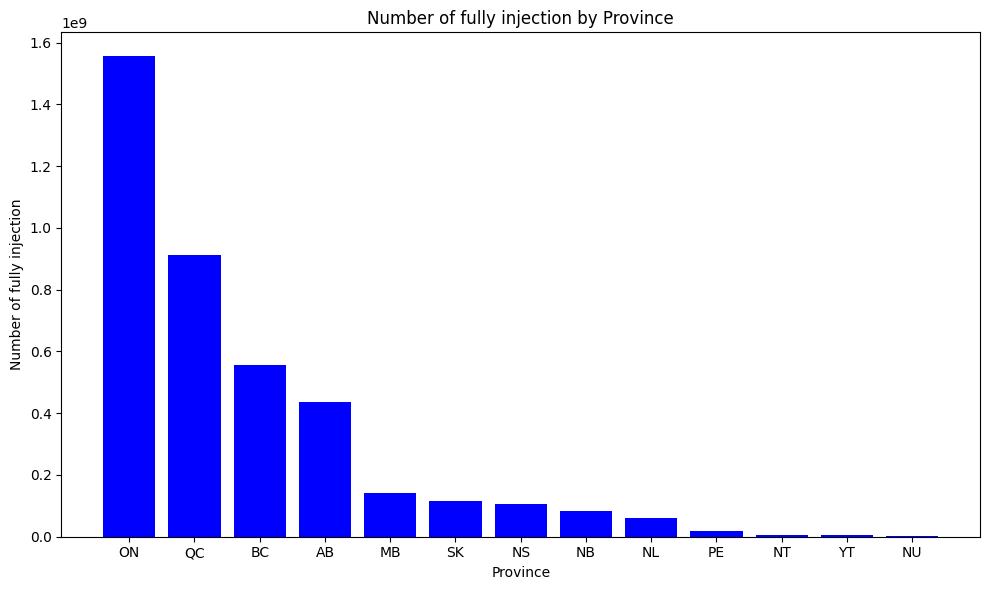

In [15]:
deaths_per_province = df.groupby('province')['fully'].sum().reset_index()

# Sort the data for better visualization
deaths_per_province_sorted = deaths_per_province.sort_values(by='fully', ascending=False)

# create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size 
plt.bar(deaths_per_province_sorted['province'], deaths_per_province_sorted['fully'], color='blue')

plt.title('Number of fully injection by Province')
plt.xlabel('Province')
plt.ylabel('Number of fully injection')


# Show the plot
plt.tight_layout()  
plt.show()

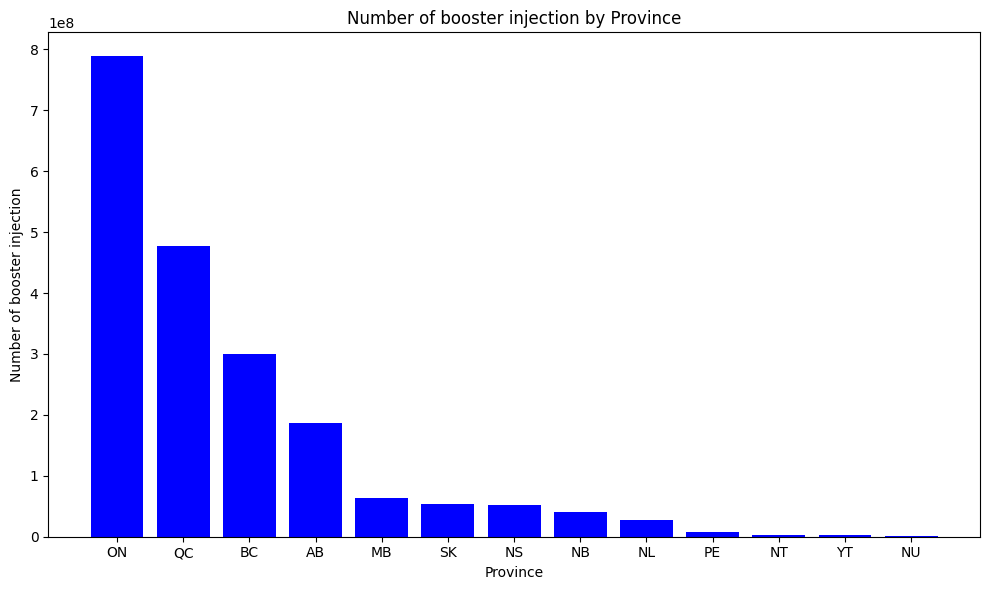

In [16]:
deaths_per_province = df.groupby('province')['booster'].sum().reset_index()

# Sort the data for better visualization
deaths_per_province_sorted = deaths_per_province.sort_values(by='booster', ascending=False)

# create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size 
plt.bar(deaths_per_province_sorted['province'], deaths_per_province_sorted['booster'], color='blue')

plt.title('Number of booster injection by Province')
plt.xlabel('Province')
plt.ylabel('Number of booster injection')


# Show the plot
plt.tight_layout()  
plt.show()